# Preprocessing

In this Assignment, we will be exploring how to preprocess tweets for sentiment analysis.


In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams.



In [ ]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [ ]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [ ]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))
print(all_negative_tweets[0])

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>
hopeless for tmr :(


## Looking at raw texts



Below, you will print one random positive and one random negative tweet.

In [ ]:
print(all_positive_tweets[random.randint(0,5000)])
print(all_negative_tweets[random.randint(0,5000)])

nd its going to expire next year. dat is mtn 6gb for u :D , You really like it?
I fucking hate when I wake up like at this time and I can't fall back asleep ugh :(


## Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming




In [ ]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Let's import a few more libraries for this purpose.

In [ ]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming

from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [ ]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts.


Time to clean up our tokenized tweet!

In [ ]:

print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Please note that the words **happy** and **sunny** in this list are correctly spelled.

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t

All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er

We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [ ]:

print(tweets_clean)

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
processed_tweet=' '.join(tweets_stem)
processed_tweet

'beauti sunflow sunni friday morn :) sunflow favourit happi friday …'

That's it! Now we have a sentence which can be feed into to the next stage
of our  project.

.

PART 2: Sentimental Analysis

In [ ]:
import numpy as np
import pandas as pd
nltk.download('twitter_samples')
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [ ]:
#print tweets here
# for tw in tweets:
# print(tw)


In [ ]:
y=np.zeros(10000)
for i in range(5000):
  y[i]=1

Now make a function and implement pre-processing into all tweets and then make an array that contains all processed tweets as strings.

In [ ]:
# Write your code here
from nltk.stem import WordNetLemmatizer    # module for lemmatizer
nltk.download('wordnet')

pro_tweets = []
for i in range(10000):
  tw = tweets[i]

  # remove old style retweet text "RT"
  tw2 = re.sub(r'^RT[\s]+', '', tw)

  # remove hyperlinks
  tw2 = re.sub(r'https?://[^\s\n\r]+', '', tw2)

  # remove hashtags
  # only removing the hash # sign from the word
  tw2 = re.sub(r'#', '', tw2)

  tw_tokens = tokenizer.tokenize(tw2)

  tw_clean = []

  for word in tw_tokens: # Go through every word in your tokens list
      if (word not in stopwords_english and  # remove stopwords
          word not in string.punctuation):  # remove punctuation
          tw_clean.append(word)
  # Instantiate lemmatizing class
  lemmatizer=WordNetLemmatizer()

  # Create an empty list to store the stems
  tw_lem = []

  for word in tw_clean:
      lem_word = lemmatizer.lemmatize(word)  # lemmatizing word
      tw_lem.append(lem_word)  # append to the list

  processed_tw=' '.join(tw_lem)

  pro_tweets.append(processed_tw)
print(pro_tweets[768])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


yes yes yes ... :)


In [ ]:
print(pro_tweets[34])

everyone watch documentary earthling youtube :-)


Now use **TfidfVectorizer** to vectorize your tweets into a numbered matrix
 **X**.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Define TF-IDF
tf_idf_vectorizer = TfidfVectorizer()

#Extract Vectors for sentences
X = tf_idf_vectorizer.fit_transform(pro_tweets)
#import pandas to create dataframe for better understanding
import pandas as pd
pd.DataFrame(X.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,00,000,001,00128835,009,00962778381,01,01282,01482,02,...,للعودة,مطعم_هاشم,एक,හව,다쇼,더쇼,에이핑크,인피니트,ｍｅ,ｓｅｅ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now you have a matrix **X** and **y** implement a model to classify this tweets.

Note:

1) You can use sequential models with tensorflow in which use 2 nodes in last layer.

2) The node which has a higher value while using *model.predict* corresponds to the output.

3) Use **SparseCategoricalCrossentropy** as a loss function.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=1234)

#mangaing data set
df= pd.DataFrame(X)
df['Output'] = y
df_train = pd.DataFrame(X_train)
df_train['Output'] = y_train
df_train_features = df_train.copy()
df_train_labels = df_train_features.pop('Output')

df_test = pd.DataFrame(X_test)
df_test['Output'] = y_test
df_test_features = df_test.copy()
df_test_labels = df_test_features.pop('Output')

In [ ]:
import tensorflow as tf
from tensorflow import keras

# normalization layer
norm = keras.layers.Normalization(axis=-1, mean=0, variance=1)
#optimizer
opt = 'adam'

model = keras.Sequential([norm,keras.layers.Dense(200, activation='relu') ,keras.layers.Dense(15, activation='relu'), keras.layers.Dense(2)])
model.build(input_shape=(None, 11116))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11116)            0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 200)               2223400   
                                                                 
 dense_1 (Dense)             (None, 15)                3015      
                                                                 
 dense_2 (Dense)             (None, 2)                 32        
                                                                 
Total params: 2,226,447
Trainable params: 2,226,447
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Output]')
  plt.legend()
  plt.grid(True)

In [ ]:
%%time
history_dnn = model.fit(
    df_train_features,
    df_train_labels,
    validation_split=0.3,
    verbose=2, epochs=1)

175/175 - 6s - loss: 0.5950 - accuracy: 0.6673 - val_loss: 0.5191 - val_accuracy: 0.7396 - 6s/epoch - 35ms/step
CPU times: user 5.35 s, sys: 590 ms, total: 5.94 s
Wall time: 7.35 s


In [ ]:
history_dnn.history

{'loss': [0.5950267910957336],
 'accuracy': [0.6673214435577393],
 'val_loss': [0.5191460251808167],
 'val_accuracy': [0.7395833134651184]}

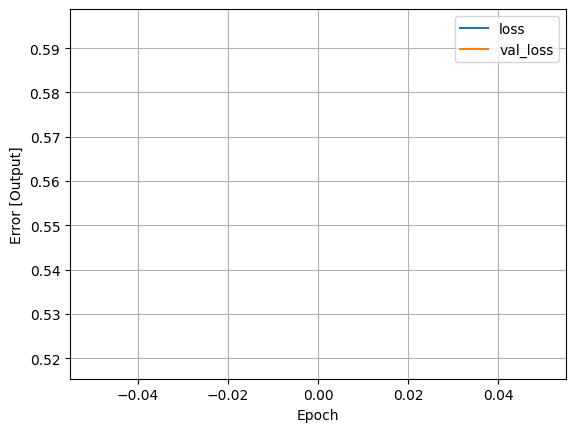

In [ ]:
# Your code here
plot_loss(history_dnn)

test_results={}
test_results['dnn_model'] = model.evaluate(df_test_features, df_test_labels, verbose=0)
#pd.DataFrame(test_results, index=['Error']).T

In [ ]:
test_loss, test_acc = model.evaluate(df_test_features,  df_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

63/63 - 0s - loss: 0.5101 - accuracy: 0.7375 - 471ms/epoch - 7ms/step

Test accuracy: 0.737500011920929


In [ ]:
# Probability model
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
# predicting the results
predictions = probability_model.predict(df_test_features)

pred_label = np.argmax(predictions, axis=1)

63/63 [==============================] - 0s 4ms/step


In [ ]:
# TP = 0
# FP = 0
# TN = 0
# FN = 0

# for i in range(len(pred_label)):
#     if y_test[i] == pred_label[i] == 1:
#        TP += 1
#     if pred_label[i] == 1 and y_test[i] != pred_label[i]:
#        FP += 1
#     if y_test[i] == pred_label[i] == 0:
#        TN += 1
#     if pred_label[i] == 0 and y_test[i] != pred_label[i]:
#        FN += 1

In [ ]:
# checking accuracy of model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_label)

TN, FP, FN, TP = confusion_matrix(y_test, pred_label).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  743
False Positive(FP) =  264
True Negative(TN)  =  732
False Negative(FN) =  261


In [ ]:
accuracy = (TP + TN)/(TP + TN + FP + FN) * 100

print("Accuracy: ", accuracy, "%")

Accuracy:  73.75 %
